In [11]:
import importlib

import os 
from nltk.corpus import movie_reviews
import random 

import utils 
import evaluation
import matplotlib.pyplot as plt

importlib.reload(evaluation)

<module 'evaluation' from '/home/cstainsby/class/NLP/CPSC475/homework/hw12/evaluation.py'>

## Load Data

Below is a helper function to read in file and separate the words into a list

In [2]:
def read_in_txt(fname):
  with open(fname) as in_file:
    in_file_str = in_file.read()
    file_contents = in_file_str.split("\n")

  return file_contents

### Training Data

In [3]:
neg_words = read_in_txt("movie_reviews/negWords.txt")
pos_words = read_in_txt("movie_reviews/posWords.txt")

print("num negative words:", len(neg_words))
print("num positive words:", len(pos_words))

num negative words: 296450
num positive words: 333400


### Testing Data

In [4]:

pos_test_files = read_in_txt("movie_reviews/posTst.txt")
neg_test_files = read_in_txt("movie_reviews/negTst.txt")

pos_test = [movie_reviews.words(fname) for fname in pos_test_files]
neg_test = [movie_reviews.words(fname) for fname in neg_test_files]

test_words = pos_test + neg_test

y_test = [1 for i in range(len(pos_test))] + [0 for i in range(len(neg_test))]

## Training
Train the model using the bags of positive and negative words

In [5]:
def train_naive_bayes(bag_of_words_pos, bag_of_words_neg):
  """trains the data by calculating priors and likelhoods 
        Args:
            bag_of_words_pos(list): list of positive words
            bag_of_words_neg(list): list of negative words
        Returns:
            priors(dict): dictionary of priors
            likelihoods(nested dict): nested dictionary of likelihoods
    """
  priors = {
    0: 0.5,
    1: 0.5
  }

  likelihoods = {}

  # adding in likelihoods for positive words
  unique_words = list(set(bag_of_words_pos))
  for unique_word in unique_words:
    likelihoods[unique_word] = {}

     # calculating likelihood percentage for negative word
    count_of_unique_word = bag_of_words_pos.count(unique_word)
    likelihoods[unique_word][1] = count_of_unique_word / len(bag_of_words_pos)
  
  # adding in likelihoods for negative words
  unique_words = list(set(bag_of_words_neg))
  for unique_word in unique_words:
    
    # word was not positive
    if unique_word not in likelihoods:
      likelihoods[unique_word] = {}
    
    # calculating likelihood percentage for negative word
    count_of_unique_word = bag_of_words_neg.count(unique_word)
    likelihoods[unique_word][0] = count_of_unique_word / len(bag_of_words_neg)

  # likelihood example: {time: {0: 0.02} {1: 0.03}}
  return priors, likelihoods

In [6]:
priors, likelihoods = train_naive_bayes(pos_words, neg_words)

## Testing 
Using the test phrases and the results from the training function above generate predictions.

In [7]:
def predict_naive_bayes(priors, likelihoods, test):
  predictions = []

  class_labels = list(priors.keys())
  for test_item in test:
    
    sum = [0 for i in range(len(priors))]
    for i, class_label in enumerate(class_labels):
      sum[i] = priors[class_label]
      for word in test_item:
        if word in likelihoods: 
          if class_label in likelihoods[word]:
              sum[class_label] += likelihoods[word][class_label]

    predictions.append(sum.index(max(sum)))
          
  return predictions

In [8]:
predicted = predict_naive_bayes(priors, likelihoods, test_words)

## Evalution of Results
The confusion matrix below displays the results from our classifier

In [9]:
matrix = evaluation.confusion_matrix(y_test, predicted, [0, 1])

positives = matrix[0]
negatives = matrix[1]

print("True Positives:", positives[0])
print("False Positives:", positives[1])
print("False Negatives:", negatives[0])
print("True Negatives:", negatives[1])

True Positives: 93
False Positives: 7
False Negatives: 56
True Negatives: 44


/tmp/ipykernel_14423/1563713083.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([''] + x_labels)
/tmp/ipykernel_14423/1563713083.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels([''] + y_labels)


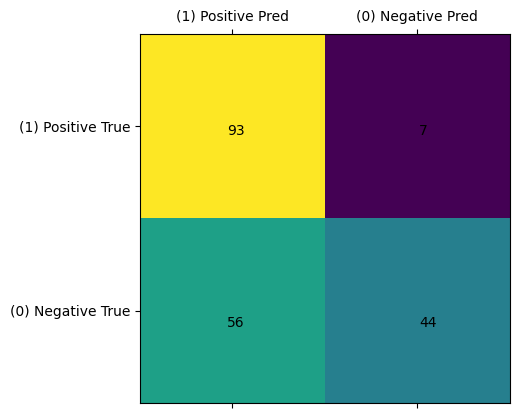

In [39]:
alphabets = ['A', 'B', 'C', 'D', 'E']
x_labels = ["(1) Positive Pred", "(0) Negative Pred"]
y_labels = ["(1) Positive True", "(0) Negative True"]

# randomly generated array
combined_confusion = [positives, negatives]

figure = plt.figure()
axes = figure.add_subplot(111)
figure.text(0.36, 0.67, positives[0])
figure.text(0.66, 0.67, positives[1])
figure.text(0.36, 0.27, negatives[0])
figure.text(0.66, 0.27, negatives[1])

# using the matshow() function
caxes = axes.matshow(combined_confusion, interpolation ='nearest')
# figure.colorbar(caxes)

axes.set_xticklabels([''] + x_labels)
axes.set_yticklabels([''] + y_labels)

plt.show()